###### Задача 1
Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [1]:
names = 'Иван Иванов, Пётр Петров, Сидор Сидоров'

In [2]:
names_list = names.split(', ')
names_list

['Иван Иванов', 'Пётр Петров', 'Сидор Сидоров']

###### Задача 2
В переменной df содержатся данные.
Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35.

In [3]:
import pandas as pd

In [4]:
d = {
'client_id': [9002, 6722, 8799, 8737, 5208],
'sex' : [1, 1, 1, 0, 0],
'wealth' : ['medium', 'high', 'high', 'low', 'medium'],
'age' : [63, 54, 62, 54, 37]    
}

In [5]:
df = pd.DataFrame(data=d)
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [6]:
medium_35 = df.query("wealth == 'medium' & age > 35")

In [7]:
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


###### Задача 3
Ваш коллега-новичок перепутал названия колонок в таблице df.
Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [8]:
d = {
'Клиент id': [9002, 6722, 8799, 8737, 5208],
'Пол' : [1, 1, 1, 0, 0],
'Благосостояние' : ['medium', 'high', 'high', 'low', 'medium'],
'Возраст' : [63, 54, 62, 54, 37]    
}

In [9]:
df = pd.DataFrame(data=d)
df

,Клиент id,Пол,Благосостояние,Возраст
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [10]:
df.rename(columns = {'Клиент id' : 'client_id', \
                     'Пол' : 'sex', \
                     'Благосостояние' : 'wealth', \
                     'Возраст' : 'age'}, \
          inplace = True)

In [11]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


###### Задача 4
Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)

In [12]:
df['older_than_30'] = df.age > 30

In [13]:
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


###### Задача 5
А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.

In [14]:
unique_num = df.nunique()

In [15]:
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

###### Задача 6
У нас появились новые данные!Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)

In [16]:
d = {
'client_id': [5392, 9581, 7250, 8619, 6573],
'amount' : [42331, 88420, 1714, 80572, 57549],
'date' : [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]
}

In [17]:
data = pd.DataFrame(data = d)

In [18]:
data

,client_id,amount,date
0,5392,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [19]:
full_data = df.merge(data, how = 'inner', on = 'client_id')
full_data

,client_id,sex,wealth,age,older_than_30,amount,date


###### Задача 7

А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

1. Принимает на вход один параметр – путь к файлу
2. Считывает переданный файл, в котором разделителем является ;
3. Считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
4. Возвращает результат этих действий (агрегированный датафрэйм)

In [20]:
import pandas as pd

In [21]:
file_path = '~/karpov_hw/karpov_data/3_companies.csv'

In [22]:
def read_n_agg(file_path):
    df = pd.read_csv(file_path, sep = ';')
    return df.groupby('company', as_index=True).agg({'income' : 'mean'})

In [23]:
read_n_agg(file_path)

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


###### Задача 8
Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя. 

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi

In [24]:
path_to_file = '~/karpov_hw/karpov_data/3_taxi_peru.csv'

In [25]:
import pandas as pd
taxi = pd.read_csv(path_to_file, sep = ';', parse_dates = ['start_at', 'end_at', 'arrived_at'])
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [26]:
taxi.end_state.unique()

array(['drop off', 'not found', 'rider cancel', 'driver cancel',
       'failure', nan, 'no show'], dtype=object)

###### Задача 9
Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [27]:
source_count = taxi.groupby('source', as_index = False) \
                   .agg({'user_id' : 'count'}) \
                   .rename(columns = {'user_id' : 'journey'})

In [28]:
source_count

,source,journey
0,Android,4909
1,Wap,136
2,iPad,571
3,iPhone,9741
4,web,7631


In [29]:
journey_sum = source_count.journey.sum()

In [30]:
source_count['ratio'] = source_count.journey / journey_sum

In [31]:
source_count['ratio'] = source_count['ratio'].round(2) * 100

In [32]:
source_count.sort_values('journey', ascending = False, inplace = True, ignore_index=True)
source_count

,source,journey,ratio
0,iPhone,9741,42.0
1,web,7631,33.0
2,Android,4909,21.0
3,iPad,571,2.0
4,Wap,136,1.0


###### Задача 10
Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).

Какой график получился?

In [33]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='source', ylabel='journey'>

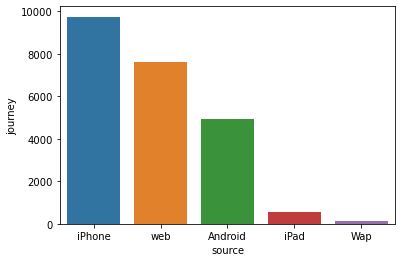

In [34]:
sns.barplot(x = 'source', y = 'journey', data = source_count)

###### Задача 11
Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.

sns.countplot(taxi['source'])

Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

<AxesSubplot:xlabel='icon', ylabel='count'>

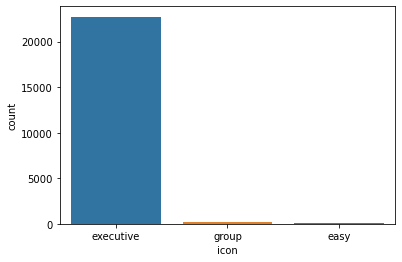

In [35]:
sns.countplot(data = taxi, x = 'icon')

<AxesSubplot:xlabel='source', ylabel='count'>

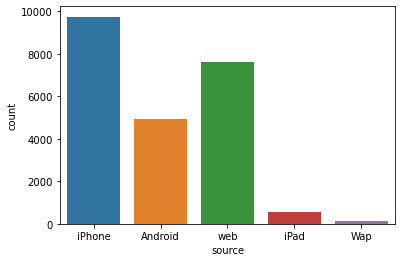

In [36]:
sns.countplot(data = taxi, x = 'source')

###### Задача 12
Теперь попробуем построить более сложный график!

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.

<AxesSubplot:xlabel='end_state', ylabel='count'>

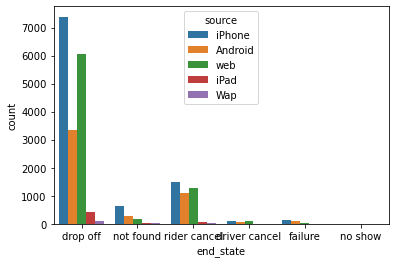

In [37]:
sns.countplot(data = taxi, x = 'end_state', hue = 'source')

###### Задача 13
Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts

In [38]:
driver_score_counts = taxi.driver_score.value_counts(normalize = True) \
                                       .mul(100) \
                                       .round(2) \
                                       .sort_index() \
                                       .to_frame() \
                                       .reset_index() \
                                       .rename(columns = {'index' : 'driver_score', 'driver_score' : 'percentage'})
                                       
                                       
driver_score_counts

,driver_score,percentage
0,0.0,14.30
1,1.0,1.23
2,2.0,0.81
3,3.0,2.97
4,4.0,21.88
5,5.0,58.81


In [39]:
driver_score_counts.columns

Index(['driver_score', 'percentage'], dtype='object')

###### Задача 14
Теперь строим график! Сначала импортируем библиотеки:

- import seaborn as sns
- import matplotlib.pyplot as plt

Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

- ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
- ax.set(xlabel='Driver score', ylabel='Percentage')
- sns.despine()  # убрать часть рамки графика
- plt.show()

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

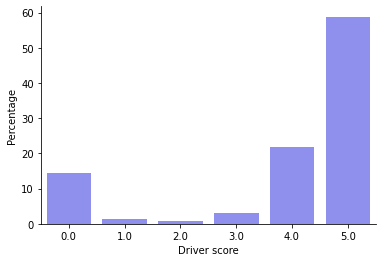

In [41]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

###### Задача 15
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?

In [42]:
rider_score_counts = taxi.rider_score.value_counts(normalize = True) \
                                     .mul(100) \
                                     .round(2) \
                                     .sort_index() \
                                     .to_frame() \
                                     .reset_index() \
                                     .rename(columns = {'index' : 'rider_score', 'rider_score' : 'percentage'})

In [43]:
rider_score_counts

,rider_score,percentage
0,0.0,2.29
1,1.0,0.21
2,2.0,0.19
3,3.0,1.38
4,4.0,8.83
5,5.0,87.10


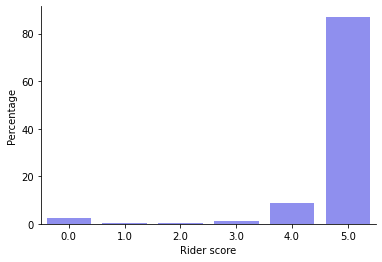

In [44]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()